# Table of Contents
* [1. &Eacute;quations différentielles](#1.-&Eacute;quations-différentielles)
	* [1.1 Définition](#1.1-Définition)
	* [1.2 Existence et unicité](#1.2-Existence-et-unicité)
	* [1.3 Equations linéaires](#1.3-Equations-linéaires)
		* [1.3.1 Résolvante](#1.3.1-Résolvante)
		* [1.3.2 Solution générale](#1.3.2-Solution-générale)
	* [1.4 Comportement asymptotique](#1.4-Comportement-asymptotique)
		* [1.4.1 Cas linéaire](#1.4.1-Cas-linéaire)
		* [1.4.2 Cas non-linéaire](#1.4.2-Cas-non-linéaire)
			* [1.4.2.1 Linéarisation](#1.4.2.1-Linéarisation)
			* [1.4.2.2 Approche de Lyapounov](#1.4.2.2-Approche-de-Lyapounov)
	* [1.5 Approximation numérique des EDO](#1.5-Approximation-numérique-des-EDO)
		* [1.5.1 Développement de Taylor](#1.5.1-Développement-de-Taylor)
		* [1.5.2 Approximation d'Euler](#1.5.2-Approximation-d'Euler)
		* [1.5.3 Runge-Kutta](#1.5.3-Runge-Kutta)
		* [1.5.4 Cas des EDO linéaires](#1.5.4-Cas-des-EDO-linéaires)
	* [1.6 À faire](#1.6-À-faire)


# 1. &Eacute;quations différentielles

## 1.1 Définition

Une **[équation différentielle](https://fr.wikipedia.org/wiki/Équation_différentielle)** est une relation mathématique entre une ou plusieurs fonctions inconnues et leurs dérivées, par exemple:

$$
F(x(z), x'(z), x''(z),z)=0
$$ 

où $z$ appartient à un "certain sous-ensemble de $\mathbb{R^d}$". Nous allons considérer le cas le plus simple, celui des équations du premier ordre avec $z=t\in\mathbb{R}_+$ représentant le temps:

\begin{align}
\label{eqCauchy}
  \dot x(t) = f(t,x(t))\,,\ t\geq 0\,,\ x(0)=x_{0}\,.
\end{align}

où $x(t)\in\mathbb{R}^d$ et $f:\mathbb{R}_+\times\mathbb{R}^d\to \mathbb{R}^d$. Le problème \eqref{eqCauchy} est appelé **problème de Cauchy** et  $x_0$ est la **condition initiale**. Lorsque $f$ ne dépend pas de $t$, l'équation différentielle est dite **autonome**, lorsque $f$ est linéaire ou affine en $x$, l'ED est dite **linéaire**.

## 1.2 Existence et unicité

L'analyse des ED n'est pas si simple (voir [Benzoni-Gavage 2010](#cite-benzoni2010a) ou [Demailly 2006](#cite-demailly2006a) pour un exposé plus complet; [Boularas et al 2009](#cite-boularas2009a) pour un exposé très vivant et accessible; [Agarwal and O'Regan 2008](#cite-agarwal2008a) pour un exposé mathématique). L'existence et l'unicité d'une solution du problème \eqref{eqCauchy} sont assurées par le [théorème de Cauchy-Lipschitz](https://fr.wikipedia.org/wiki/Théorème_de_Cauchy-Lipschitz). 

Le problème \eqref{eqCauchy}  est un problème local en temps, nous nous contentons ici de donner quelques éléments dans le cas plus simple de solutions globales en supposant que $f$ est  globalement lipschitzienne:


>**Hypothèse (second membre globalement lipschitzien):** La fonction  $f$ est dite *globalement lipschitzienne* en $x$ uniformément en $t$, s'il existe  une constante $L$ telle que:
>
>\begin{align*}
  |f(t,x)-f(t,y)| \leq L\,|x-y|\,,\ \forall t,x,y\,.
\end{align*}
>
><img src="./images/lipschitz2.pdf" alt="Lipschitz" style="width: 200px;"/>

Une fonction lipschitzienne est continue mais pas nécessairement dérivable. Lorsque $f$ admet une dérivée uniformément bornée par une constante $C$, i.e. $|\partial f(t,x)/\partial x|\leq C$ pour tout $(t,x)$, alors elle est lipschitzienne avec constante $C$.

On dira que l'équation \eqref{eqCauchy} admet une **solution unique** si, étant données deux fonctions $x_i(t)$ vérifiant \eqref{eqCauchy}, $i=1,2$, alors $x_1(t)=x_2(t)$ pour tout $t\geq 0$.


> **Proposition (existence et unicité):** Supposons que $(t,x)\to f(t,x)$ soit continue et globalement lipschitzienne en $x$ uniformément en $t$, alors l'équation \eqref{eqCauchy} admet une et une seule solution.

Pour démontrer l'unicité, il faut faire appel à un résultat classique, appelé [lemme de Gronwall](https://fr.wikipedia.org/wiki/Lemme_de_Grönwall), qui permet de démontrer que si $x_{i}(\cdot)$, $i=1,2$, sont deux solutions du problème \eqref{eqCauchy}, alors le fait que $f$ soit globalement lipschitzienne implique que:

$$
   |x_{1}(t)-x_{2}(t)| \leq e^{L\,|t|}\,|x_{1}(0)-x_{2}(0)|\,,\forall t\geq 0\,.
$$


Donc si $x_{1}(0)=x_{2}(0)=x_0$ alors $x_{1}(t)=x_{2}(t)$ pour tout $t$. 

Il existe deux méthodes classiques pour exhiber des solutions du problème de Cauchy et donc montrer l'existence d'une solution. Nous verrons plus loin la méthode d'**approximation d'Euler**, une autre approche classique, puissante mais moins constructive, consiste à faire appel aux **approximations successives de Picard**. On se donne $x^{(0)}(t)$ continue, par exemple $x^{(0)}(t)=x_0$ pour tout $t$, et on pose:

$$
    x^{(n+1)} = \mathcal{I} x^{(n)}
$$

où $\mathcal{I}$ est un opérateur qui à une fonction $x:\mathbb R_+\to \mathbb R^d$ asscocie une $\mathcal{I}x:\mathbb R_+\to \mathbb R^d$ définie par

$$
   [\mathcal{I} x](t) = x_{0} + \int_{t_{0}}^t f(s,x(s))\,{\rm d} s\,,\ t\geq 0\,.
$$

La solution de \eqref{eqCauchy} apparait alors comme un [point fixe](https://fr.wikipedia.org/wiki/Point_fixe) de l'opérateur $\mathcal{I}$, i.e. $x$ telle que $x=\mathcal{I} x$. La démonstration de l'existence d'une solution du problème de Cauchy \eqref{eqCauchy} consiste alors à démontrer l'existence d'un point fixe de l'opérateur $\mathcal I$ en démontrant que cet opérateur est contractant. La preuve de ce résultat est donnée dans [[Benzoni-Gavage 2010](#cite-benzoni2010a) p. 147].

> **Exemple de non-unicité:** On considère l'ED autonome:
>
>$$
  \dot x(t) = 2\,\sqrt{x(t)}\,,\ x(0)=0\,.
$$
> 
> Il est clair que $x_{1}(t)=0$, $t\geq 0$ est une solution de cette équation ainsi que  $x_{2}(t)=t^2$, $t\geq 0$. Par une technique de *recollement* consistant à mettre bout à bout ces deux solutions, on peut cosntruire une infinité de solutions. En effet:

>$$
  x_{1}(t) = \left\{
  \begin{array}{ll}
   0\,,& 0\leq t\leq a
   \\
   (t-a)^2\,, & t\geq a 
  \end{array}
  \right.
  $$

>défini une solution différente pour tout $a\geq 0$.
Ici $f(x)=2\,\sqrt{x}$ n'est pas globalement uniformément lipschitzienne à cause de son comportement en $O$.

> **Exemple de non-existence de solution globale:**
Considérons un modèle de croissance de population - peu réaliste - où le taux de croissance per capita est linéaire en la taille de population:
> 
> $$
  \dot x(t)=\lambda\,x(t)^2\,,\ x(0)=x_{0}
$$
> 
> On peut vérifier que la solution de cette équation est:
> 
> $$
  x_{t} = \frac{x_{0}}{1-\lambda\,x_{0}\,t}
$$
> 
> qui est définie sur $t\in[0,\frac{1}{\lambda x}[$ et on a effectivement $x(t)\uparrow\infty$ lorsque $t\uparrow \frac{1}{\lambda x}$. Il n'est pas possible d'étendre la solution à tout $t>0$ dans la mesure où $f(x)=\lambda\,x^2$ n'est pas à croissance au plus linéaire, donc pas globalement lipschitzienne, à cause de son comportement en $+\infty$.

## 1.3 &Eacute;quations linéaires

On considère le problème de Cauchy linéaire:\index{equation@équation différentielle!linéaire}

\begin{align}
\label{eqCauchy2}
  \dot x(t) = A(t)\,x(t)+b(t)\,,\ t\geq 0\,,\ x(0)=x_{0}
\end{align}

où l'on suppose que la matrice $A(t)$ et le vecteur $b(t)$ sont continus en $t$, on obtient alors l'existence et l'unicité d'une solution à ce problème puisque $f(t,x)=A(t)\,x+b(t)$ est globalement lipschitzienne en $x$ uniformément en $t$.


Soit $x_{i}(t)$ la solution de \eqref{eqCauchy2} où $b(t)$ est remplacé par $b_{i}(t)$, pour $i=1,2$. On vérifie aisément que pour tous réels $c_{1},c_{2}$, $c_{1}\,x_{1}(t)+c_{2}\,x_{2}(t)$ est solution de  \eqref{eqCauchy2} où $b(t)$ est remplacé par $c_{1}\,b_{1}(t)+c_{2}\,b_{2}(t)$. Pour $b_{i}(t)=0$, $x_{i}(t)$ est notamment solution de l'équation homogène:

\begin{align}
\label{eqCauchy2b0}
  \dot x(t) = A(t)\,x(t)
\end{align}

tout comme $c_{1}\,x_{1}(t)+c_{2}\,x_{2}(t)$, i.e. les solutions de \eqref{eqCauchy2b0} forment un espace vectoriel. De plus si $b_{1}(t)=b_{2}(t)$, $c_{1}=-c_{2}=1$ et $x_{1}(t)$ est solution de \eqref{eqCauchy2}, alors $x_{2}(t)$ est aussi solution de \eqref{eqCauchy2}. Donc les solutions de \eqref{eqCauchy2} sont obtenues en additionnant une solution particulière de \eqref{eqCauchy2} aux solutions de \eqref{eqCauchy2b0}.

### 1.3.1 Résolvante

Les solutions de \eqref{eqCauchy2b0} forment un espace vectoriel dont on peut construire une base en considérant la *résolvante*, c'est à dire la famille de matrices $\Phi(t,s)$ définie par:

\begin{align}
\label{eqCauchy2Resolvante}
  \frac{{\rm d}}{{\rm d} t} \Phi(t,s) = A(t)\,\Phi(t,s)\,,\ t\geq 0\,,\ \Phi(s,s)=I
\end{align}

pour tous $0\leq s\leq t$; alors les colonnes de $\Phi(t,0)$ forment une base de l'ensemble des solutions de \eqref{eqCauchy2b0}  [[Agarwal and O'Regan2008](#cite-agarwal2008a) p. 116].


On peut expliciter $\Phi$ en utilisant les approximations successives de Picard: $\Phi^{(0)}(t,s)=I$, puis les itérations $\Phi^{(n+1)}(t,s)=I+\int_{s}^t A(r)\,\Phi^{(n)}(t,s)\,{\rm d} r$ qui convergent donc vers:

\begin{align}
\label{eqCauchy2ResolvanteExplicite}
\Phi(t,s)
  =
  I
  +\int_{s}^t A(r)\,{\rm d} r
  +\int_{s}^t\int_{s}^{r} A(r)\,A(r')\,{\rm d} r'\,{\rm d} r
  +\cdots
\end{align}

qui est solution de \eqref{eqCauchy2Resolvante}. 




Soit $\Phi(t,s)$ la résolvante de l'équation \eqref{eqCauchy2}, on peut montrer que:

$$
   \Phi(t,s) = \Phi(t,r)\times \Phi(r,s)
$$

et en particulier $\Phi(t,s) = \Phi(s,t)^{-1}$ et $\Phi(t,t)=I$.



Lorsque $A(t)\equiv A$, l'équation \eqref{eqCauchy2ResolvanteExplicite} devient 

$$
\Phi(t,s)
  =
  I
  + (t-s)\,A
  + \frac12 (t-s)^2\,A^2
  + \frac1{3!} (t-s)^3\,A^3
  +\cdots
$$

qui est une série absolument convergente que l'on appelle exponentielle de la matrice $(t-s)\,A$:

$$
  \Phi(t,s)
  =
  \Phi(t-s)
  =
  e^{(t-s)\,A}
$$

où:

> **Définition:**
Soit $M$ une matrice carrée, on définit l'[**exponentielle $e^M$ de la matrice $M$**](https://fr.wikipedia.org/wiki/Exponentielle_d%27une_matrice)  par:
>
>$$
  e^{M}
  :=
  \sum_{n\in\mathbb N} \frac{1}{n!} M^n
$$

> (avec les conventions usuelles $A^0=I$ et $0!=1$). On a les propriétés suivantes:
>
> - Si $M_{1}$ et $M_{2}$ sont des matrices carrées qui commutent alors $e^{M_{1}}\,e^{M_{2}} = e^{M_{2}}\,e^{M_{1}} = e^{M_{1}+M_{2}}$. 
> - Si $M$ est une matrice carrée alors $e^M$ est inversible et son inverse est $e^{-M}$. 
>- Si $C$ est inversible alors $e^{CMC^{-1}}=C\,e^{M}\,C^{-1}$.


### 1.3.2 Solution générale

Une fois la résolvante obtenue, afin de déterminer les solutions de \eqref{eqCauchy2} on utilise la [méthode de variation des constantes](https://fr.wikipedia.org/wiki/Méthode_de_variation_des_constantes). 

On cherche une fonction $y(t)$ telle que $x(t)=\Phi(t,0)\,y(t)$ soit solution  de \eqref{eqCauchy2}, c'est à dire telle que:

$$
  \dot \Phi(t,0)\,y(t)+ \Phi(t,0)\,\dot y(t)
  =
  A(t)\,\Phi(t,0)\,y(t)+b(t)
$$

ce qui donne $\Phi(t,0)\,\dot y(t) = b(t)$, donc:

$$
\dot y(t) = \Phi(t,0)^{-1}\,b(t) = \Phi(0,t)\,b(t)
$$

et ainsi, la fonction  $y(t)$ s'écrit:

$$
y(t)  = y(0) + \int_{0}^t \Phi(0,t)\,b(t){\rm d} t
$$

Enfin $x(0)=\Phi(0,0)\,y(0)=y(0)$, donc la solution de \eqref{eqCauchy2} s'écrit

$$
x(t) = \Phi(t,0) \,x_{0} +\Phi(t,0) \,\int_{0}^t \Phi(0,s)\,B(s)\,{\rm d} s
$$

ou encore

$$
x(t) = \Phi(t,0) \,x_{0} + \int_{0}^t \Phi(t,s)\,B(s)\,{\rm d} s
$$

Lorsque $A(t)\equiv A$, alors $\Phi(t,s)=e^{A\,(t-s)}$ et 
$$
x(t) = e^{A\,t} \,x_{0} + \,\int_{0}^t e^{A\,(t-s)}\,B(s)\,{\rm d} s\,.
$$


## 1.4 Comportement asymptotique

On considère le problème de Cauchy autonome suivant:

\begin{equation}
\label{eqCauchy2Auto}
  \dot x(t) = f(x(t))\,,\ t\geq 0\,,\ x(0)=x_{0}
\end{equation}

pour laquelle on suppose qu'il existe une solution globale. On peut par exemple supposé que $f$ est globalement lipschitzienne.

Supposons que la solution $x(t)$ de \eqref{eqCauchy2Auto} converge vers un point $x^*$ de $\mathbb{R}^d$, alors nécessairement $x(t)$ va cesser d'évoluer au ``bout d'un certain temps'' de telle sorte que $\dot x(t)=0$ et donc néces\-sairement $f(x^*)=0$. Un tel point est appelé **point d'équilibre** de l'équation différentielle. Dans un premier temps sans se poser la question du comportement asymptotique de la solution de l'EDO, on peut chercher à déterminer les points d'équilibre de l'EDO.

Dans un second temps, on peut chercher à caractériser la nature de ces points d'équilibre. Un point d'équilibre $x^*$ sera dit \emph{stable}\index{point d'équilibre!stable} si:

\begin{align}
\label{eqStable}
  \forall \epsilon>0\,,\ \exists \eta>0\,:\ 
  |x_{0}-x^*| <\eta \Rightarrow |x(t)-x^*|<\epsilon\,,\ \forall t\geq 0\,.
\end{align}

Si de plus:

\begin{align}
\label{eqAsymptotiquementStable}
  |x(t)-x^*|\to 0\textrm{ lorsque }t\to \infty
\end{align}

alors le point est dit **asymptotiquement stable**. Un point d'équilibre qui n'est pas stable est dit **instable**.

### 1.4.1 Cas linéaire

On considère le problème de Cauchy autonome linéaire suivant:

\begin{align}\label{eqCauchyLin}
  \dot x(t) = A\,x(t)\,,\ t\geq 0\,,\ x(0)=x_{0}
\end{align}

Il est bien connu que le comportement asymptotique de la solution de cette équation est liée aux propriétés spectrales de la matrice; on note $Sp(A)$ le spectre de la matrice $A$, c'est à dire l'ensemble de ses valeurs propres. 

Le point $0$ est un point d'équilibre de \eqref{eqCauchyLin} et:

- $0$ est asymptotiquement stable ssi $Re(\lambda)<0$ pour tout $\lambda\in Sp(A)$;
- $0$ est stable ssi pour tout $\lambda\in Sp(A)$:
   - $Re(\lambda)\leq 0$;
   - et lorsque $Re(\lambda) = 0$ alors la multiplicité géométrique de $\lambda$ correspond à sa multiplicité algébrique (la multiplicité géométrique de $\lambda$ est la dimension du noyau de $A-\lambda\,I$; la multiplicité algébrique de $\lambda$ est la multiplicité comme  racine du polynôme caractéristique).

Ce résultat s'appuie en fait sur la compréhension de la résolvante du système \eqref{eqCauchyLin} qui est en effet donnée par [[Agarwal and O'Regan 2008](#cite-agarwal2008a)  p. 133]:

$$
  \Phi(t,0)
  =
  \bigl[ e^{\lambda_{1}\,t}\,v_{1},\dots,e^{\lambda_{n}\,t}\,v_{n}\bigr]
$$
où $\lambda_{i}$ sont les valeurs propres de $A$ et $v_{i}$ des vecteurs propres associés.

### 1.4.2 Cas non-linéaire

On considère le problème de Cauchy autonome non-linéaire suivant:

\begin{align}
\label{eqCauchy2Nl}
  \dot x(t) = f(x(t))\,,\ t\geq 0\,,\ x(0)=x_{0}
\end{align}

et $x^*$ un point d'équilibre. On suppose $f$ différentiable et à dérivées continues.

On peut supposer que $f(0)=0$ et donc que $x^*=0$ en faisant le changement de variable $x\to x-x^*$ dans \eqref{eqCauchy2Nl}. On se place donc dans le cas $f(0)=0$ et on étudie les propriétés du point d'équilibre 0.  On note $J_f(0)$ la matrice jacobienne de $f$ au point d'équilibre~$0$. 


**Exemple:** Les points d'équilibre de l'équation logistique.



#### 1.4.2.1 Linéarisation

Une méthode classique consiste à étudier le système linéarisé en $0$:

\begin{align}
\label{eqCauchy2NlLinearise}
  \dot x(t) = J_f(0)\,x(t)\,,\ t\geq 0\,,\ x(0)=x_{0}
\end{align}

où $J_f(x)$ est la matrice jacobienne de $f$ en $x$:
$$
J_f(x)
   :=
   \left(\begin{matrix}
      \partial f_{1}(x)/\partial x_{1} & 
      \partial f_{1}(x)/\partial x_{2} &
      \cdots & 
      \partial f_{1}(x)/\partial x_{d} & 
   \\
      \partial f_{2}(x)/\partial x_{1} & 
      \partial f_{2}(x)/\partial x_{2} &
      \cdots & 
      \partial f_{2}(x)/\partial x_{d} & 
   \\
      \vdots  & 
      \vdots &
       & 
      \vdots & 
   \\[0.5em]
      \partial f_{d}(x)/\partial x_{1} & 
      \partial f_{d}(x)/\partial x_{2} &
      \cdots & 
      \partial f_{d}(x)/\partial x_{d} & 
   \end{matrix}\right)
$$

Alors:
- si pour tout $\lambda\in Sp(J_f(0))$  on a $\Re(\lambda)<0$   alors $0$ est asymptotiquement stable pour \eqref{eqCauchy2Nl};
- s'il existe  $\lambda\in Sp(J_f(0))$  tel que $\Re(\lambda)>0$ alors $0$ est instable  pour \eqref{eqCauchy2Nl}.


Si toutes les valeurs propres ont des parties réelles nulles alors $0$ est stable pour \eqref{eqCauchy2NlLinearise} mais on ne peut rien dire de $0$ pour \eqref{eqCauchy2Nl}.

#### 1.4.2.2 Approche de Lyapounov

On se place dans un voisinage $\mathcal{V}$ de $0$, une fonction $V:\mathcal{V}\mapsto\mathbb R$ continue et différentiable sur $\mathcal{V}\setminus\{0\}$ est appelée *fonction de Lypounov* si:

- $V(0)=0$ et $V(x)>0$ pour tout $x\in \mathcal{V}\setminus\{0\}$;
- $f(u)\,\nabla V(u)\leq 0$ pour tout $x\in \mathcal{V}\setminus\{0\}$.

On a alors le résultat suivant: s'il existe une fonction de Lyapounov pour \eqref{eq.cauchy2.nl} alors le point d'équilibre $0$ est stable.

## 1.5 Approximation numérique des EDO

Le module `integrate` de [SciPy](https://www.scipy.org) propose deux outils pour [intégrer numériquement des EDO](https://en.wikipedia.org/wiki/Numerical_methods_for_ordinary_differential_equations?oldid=550976985): `integrate.odeint` et `integrate.ode`. 

- `integrate.odeint` est une fonction implémentant le solveur LSODA d'ODEPACK qui bascule automatiquement entre une méthode de prédiction-correction d'Adam Adams pour des problèmes non-raides à une méthode BDF pour les problèmes raides.

- `integrate.ode` est une classe offrant une interface orientée objet donnant accès à plusieurs solveurs.

`integrate.ode` est plus flexible mais `integrate.odeint` est nettement plus accessible. Nous nous limiterons ici à ce dernier solveur.
La fonction `odeint` comprend 3 arguments obligatoires : une fonction définissant le membre de droit de l'EDO, i.e. la fonction $f$,  un array donnant la condition initiale, est un array de valeurs de $t$ où $x(t)$ doit être calculé.  La fonction du membre de droite comprends 2 arguments obligatoires, un array $x$ et un scalaire  $t$, et des arguments optionnels.

Voir [[Johansson 2015 p. 223](#cite-johansson2015a)].

### 1.5.1 Développement de Taylor

On considère une solution $x(t)$ du problème de Cauchy  \eqref{eqCauchy} définie pour $t\in[0,T]$ avec $t_{0}=0$. 
On se donne $\delta>0$, on pose $t_{k}=k\,\delta$ et on considère le développement de Taylor:

$$
  x(t+\delta) = x(t) + \delta\,x'(t) + \frac{\delta^2}{2}\,x''(t)
  + \frac{\delta^3}{3!}\,x'''(t)+\cdots
$$

À l'ordre $n$, on a la formule:

$$
  x(t+\delta) = x(t) + \delta\,x'(t) + \frac{\delta^2}{2}\,x''(t)
  + \frac{\delta^3}{3!}\,x'''(t)+\cdots+\frac{\delta^n}{n!}\,x^{(n)}(\tau)
$$
pour un certain $\tau\in[t,t+\delta]$

### 1.5.2 Approximation d'Euler

L'approximation d'Euler de $x(t)$ consiste à tronquer à l'ordre 1:
$$
  x(t+\delta) = x(t) + \delta\,x'(t) +\frac{\delta^2}{2}\,x^{''}(\tau)
$$

donc

$$
  x(t+\delta) = x(t) + \delta\,f(t,x(t)) + O(\delta^2)
$$

(ordre 1: erreur locale en $O(\delta^2)$, erreur globale en $O(\delta)$)



<img src="./images/er_euler.png" alt="Schema d'Euler" style="width: 200px;"/>



On obtient l'approximaton:
\begin{align}
\label{eqEuler}
   \tilde x_{k+1} 
   = 
   \tilde x_k+\delta\,f(t_{k},\tilde x_k)
\end{align}

$\delta$ est le pas de l'approximation, on définit $\tilde x(t)$ comme étant l'interpolée linéaire des points $\tilde x_k$.


<img src="./images/euler_erreur.png" alt="Schema d'Euler" style="width: 500px;"/>

### 1.5.3 Runge-Kutta

Cette méthode reprend la méthode d'Euler en utilisant une approximation de la dérivée au point milieu. Le développement de Taylor à l'rdore 3 donne:

$$
  x(t+\delta) = x(t) + \delta\,x'(t) + \frac{\delta^2}{2}\,x''(t)
  + \frac{\delta^3}{3!}\,x'''(\tau)
$$

mais 

$
x'(t+\delta/2) = x'(t)+ \frac{\delta}{2}\,x''(t)+O(\delta^2)
$ donc 
$
\frac{\delta^2}{2}\,x''(t)= \delta[x'(t+\delta/2) - x'(t)]  +O(\delta^3)
$ et

\begin{align*}
  x(t+\delta) 
  &= x(t) + \delta x'(t) + \frac{\delta^2}{2}\,\frac{x'(t+\delta/2)-x'(t)}{\delta/2} + O(\delta^3)
  \\
  &= x(t) + \delta  x'(t+\delta/2)  + O(\delta^3)
  \\
  &= x(t) + \delta  f(t+\delta/2,x(t+\delta/2))  + O(\delta^3)
  \\
  &= x(t) + \delta  f\big(t+\delta/2,x(t)+(\delta/2)\,f(t,x(t))\big)  + O(\delta^3)
\end{align*}



<img src="./images/er_rk2.png" alt="Schema RK2" style="width: 200px;"/>



il s'agit donc d'un schéma d'ordre 2:

\begin{align}
\label{eqRK2}
   \tilde x_{k+1} 
   = 
   \tilde x_k+\delta\,f\Big(t_{k}+\frac{\delta}{2},\tilde x_k+\frac{\delta}{2}\,f(t_k,\tilde x_k)\Big)
\end{align}

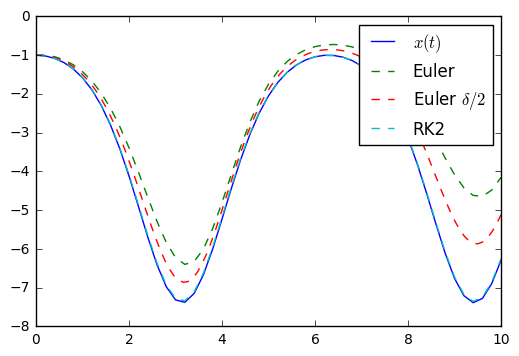

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def euler( f, x0, t ):
    n = len( t )
    x = np.array( [x0] * n )
    for i in range(n-1):
        x[i+1] = x[i] + ( t[i+1] - t[i] ) * f( x[i], t[i] )
    return x

def rk2a( f, x0, t ):
    n = len( t )
    x = np.array( [ x0 ] * n )
    for i in range( n - 1 ):
        h = t[i+1] - t[i]
        k1 = 0.5 * h * f( x[i], t[i] ) 
        x[i+1] = x[i] + h * f( x[i] + k1, t[i] + 0.5 * h  )
    return x

def f( x, t ):
    return x * np.sin( t )

x0, T =  -1., 10.0
n = 51
t = np.linspace( 0, T, n )
t2 = np.linspace( 0, T, 2*n )

x = -np.exp( 1.0 - np.cos( t ) )
x_euler = euler( f, x0, t )
x_euler2 = euler( f, x0, t2 )
x_rk2 = rk2a( f, x0, t )

plt.plot(t,x,label=r'$x(t)$')
plt.plot(t,x_euler,label='Euler',linestyle='--')
plt.plot(t2,x_euler2,label=r'Euler $\delta/2$',linestyle='--')
plt.plot(t,x_rk2,label='RK2',linestyle='--')
plt.legend()
plt.show()


### 1.5.4 Cas des EDO linéaires

voir

[[Hairer et al 1993 p. 64](#cite-ErnstHairer1993a)]

<!--bibtex

@book{agarwal2008a,
	Author = {R.P. Agarwal and D. O'Regan},
	Publisher = {Springer},
	Title = {An introduction to ordinary differential equations},
	Year = {2008}}

 
@book{benzoni2010a,
	Author = {Sylvie Benzoni-Gavage},
	Publisher = {Dunod},
	Title = {Calcul diff{\'e}rentiel et équations diff{\'e}rentielles},
	Year = {2010}}

@book{boularas2009a,
	Author = {Driss Boularas and Daniel Fredon and Daniel Petit},
	Publisher = {Dunod},
	Title = {Mini Manuel de Mathématiques pour les sciences de la vie et de l'environnement},
	Year = {2009}}

@book{demailly2006a,
	Author = {Demailly, J.P.},
	Opturl = {http://books.google.fr/books?id=2yTLzzm3N6kC},
	Publisher = {EDP Sciences},
	Title = {Analyse num{\'e}rique et équations fiff{\'e}rentielles},
	Year = {2006}}
    
@book{ErnstHairer1993a,
	Author = {E. Hairer and S. P. N{\o}rsett and G. Wanner},
	Edition = {Second},
	Publisher = {Springer},
	Title = {Solving Ordinary Differential Equations I : Nonstiff Problems},
	Year = {1993}}


@book{johansson2015a,
	Author = {Robert Johansson},
	Publisher = {Apress},
	Title = {Numerical Python. A Practical Techniques Approach for Industry},
	Year = {2015}}


-->

# References

<a name="cite-benzoni2010a"/><sup>[^](#ref-1) [^](#ref-5) </sup>Sylvie Benzoni-Gavage. 2010. _Calcul diff&eacute;rentiel et équations diff&eacute;rentielles_.

<a name="cite-demailly2006a"/><sup>[^](#ref-2) </sup>Demailly, J.P.. 2006. _Analyse num&eacute;rique et équations fiff&eacute;rentielles_.

<a name="cite-boularas2009a"/><sup>[^](#ref-3) </sup>Driss Boularas and Daniel Fredon and Daniel Petit. 2009. _Mini Manuel de Mathématiques pour les sciences de la vie et de l'environnement_.

<a name="cite-agarwal2008a"/><sup>[^](#ref-4) [^](#ref-6) [^](#ref-7) </sup>R.P. Agarwal and D. O'Regan. 2008. _An introduction to ordinary differential equations_.

<a name="cite-johansson2015a"/><sup>[^](#ref-8) </sup>Robert Johansson. 2015. _Numerical Python. A Practical Techniques Approach for Industry_.

<a name="cite-ErnstHairer1993a"/><sup>[^](#ref-9) </sup>E. Hairer and S. P. N\orsett and G. Wanner. 1993. _Solving Ordinary Differential Equations I : Nonstiff Problems_.



## 1.6 À faire

Animation, voir [ici](http://python.physique.free.fr/animations.html) et [là](http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/).

In [1]:
"""
Animation d'une particule se baladant sur une ellipse
"""

from __future__ import division
from scipy import *                 
from pylab import *
import os

#initialisation
tini = 0
tfin = 2
Npas = 100

#Positions Successives
def Positions(t):
    x = 0.5*cos(2*pi*t)
    y = 0.5*sin(2*pi*t)
    return [x, y]

# Construction d'une série d'images et de leur assemblage dans une animation
print ('Nplot = ', end="")
for k in range(Npas):
    t = tini + (tfin-tini)*k/(Npas-1)
    plot(Positions(t)[0], Positions(t)[1], 'o', color='b')
    axis([-1, 1, -1, 1])
    filename = 'fichierTemp'+str('%02d' %k)+'.pdf'
    savefig(filename)
    print (' ',k, end="")
    clf()

# convert est une fonction d'ImageMagick : option -delay en 1/100 de seconde
cmd = 'convert fichierTemp*.pdf images/animation.gif'
print ('\n','conversion... ', end="")
os.system(cmd)
os.system('rm fichierTemp*.pdf')    # destruction des fichiers temporaires (utiliser rem sous Linux)
print (" fini !")

Nplot =   0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 conversion...  fini !


Voila le résultat:

![animation](images/animation.gif)



<img src="https://en.wikipedia.org/wiki/Phase_plane#/media/File:Phase_plane_nodes.svg" alt="schema_pop" style="width: 150px;"/>


[voir cette page](https://en.wikipedia.org/wiki/Phase_plane)


trace -1   déterminant  3   delta  -11


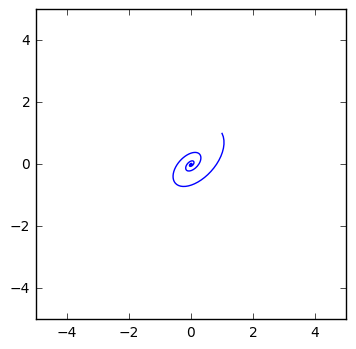

In [48]:
from scipy.integrate import odeint
import numpy as np

def f_lin(x,t):
    x1, x2 = x
    return [a*x1+b*x2, c*x1+d*x2]
    
a,b,c,d = -2,3,-3,1
T = 50
trace = a+d
determinant = a*c-b*d
delta = trace**2-4*determinant

print('trace',trace,'  déterminant ',determinant,'  delta ',delta)
x0 = [1, 1]
t = np.linspace( 0, T, 1000)

x = odeint( f_lin, x0, t )
plt.plot(x[:,0],x[:,1])
plt.axis('square')
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.show()



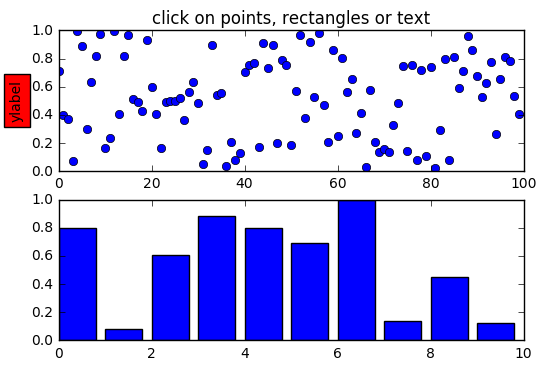

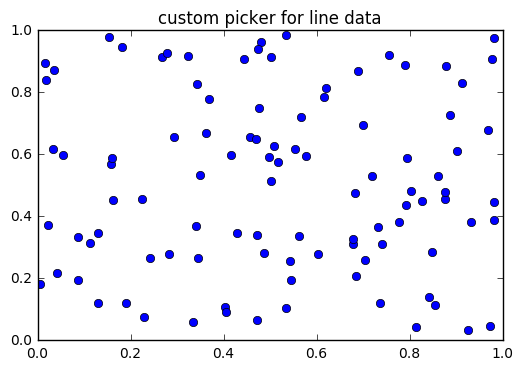

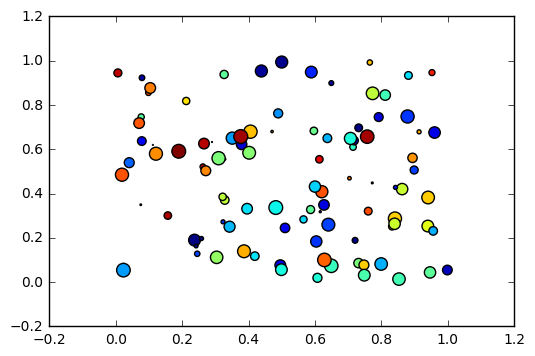

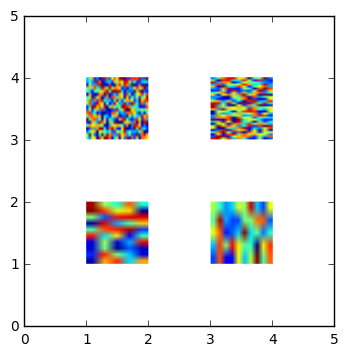

In [49]:
from __future__ import print_function
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle
from matplotlib.text import Text
from matplotlib.image import AxesImage
import numpy as np
from numpy.random import rand

if 1:  # simple picking, lines, rectangles and text
    fig, (ax1, ax2) = plt.subplots(2, 1)
    ax1.set_title('click on points, rectangles or text', picker=True)
    ax1.set_ylabel('ylabel', picker=True, bbox=dict(facecolor='red'))
    line, = ax1.plot(rand(100), 'o', picker=5)  # 5 points tolerance

    # pick the rectangle
    bars = ax2.bar(range(10), rand(10), picker=True)
    for label in ax2.get_xticklabels():  # make the xtick labels pickable
        label.set_picker(True)

    def onpick1(event):
        if isinstance(event.artist, Line2D):
            thisline = event.artist
            xdata = thisline.get_xdata()
            ydata = thisline.get_ydata()
            ind = event.ind
            print('onpick1 line:', zip(np.take(xdata, ind), np.take(ydata, ind)))
        elif isinstance(event.artist, Rectangle):
            patch = event.artist
            print('onpick1 patch:', patch.get_path())
        elif isinstance(event.artist, Text):
            text = event.artist
            print('onpick1 text:', text.get_text())

    fig.canvas.mpl_connect('pick_event', onpick1)

if 1:  # picking with a custom hit test function
    # you can define custom pickers by setting picker to a callable
    # function.  The function has the signature
    #
    #  hit, props = func(artist, mouseevent)
    #
    # to determine the hit test.  if the mouse event is over the artist,
    # return hit=True and props is a dictionary of
    # properties you want added to the PickEvent attributes

    def line_picker(line, mouseevent):
        """
        find the points within a certain distance from the mouseclick in
        data coords and attach some extra attributes, pickx and picky
        which are the data points that were picked
        """
        if mouseevent.xdata is None:
            return False, dict()
        xdata = line.get_xdata()
        ydata = line.get_ydata()
        maxd = 0.05
        d = np.sqrt((xdata - mouseevent.xdata)**2. + (ydata - mouseevent.ydata)**2.)

        ind = np.nonzero(np.less_equal(d, maxd))
        if len(ind):
            pickx = np.take(xdata, ind)
            picky = np.take(ydata, ind)
            props = dict(ind=ind, pickx=pickx, picky=picky)
            return True, props
        else:
            return False, dict()

    def onpick2(event):
        print('onpick2 line:', event.pickx, event.picky)

    fig, ax = plt.subplots()
    ax.set_title('custom picker for line data')
    line, = ax.plot(rand(100), rand(100), 'o', picker=line_picker)
    fig.canvas.mpl_connect('pick_event', onpick2)


if 1:  # picking on a scatter plot (matplotlib.collections.RegularPolyCollection)

    x, y, c, s = rand(4, 100)

    def onpick3(event):
        ind = event.ind
        print('onpick3 scatter:', ind, np.take(x, ind), np.take(y, ind))

    fig, ax = plt.subplots()
    col = ax.scatter(x, y, 100*s, c, picker=True)
    #fig.savefig('pscoll.eps')
    fig.canvas.mpl_connect('pick_event', onpick3)

if 1:  # picking images (matplotlib.image.AxesImage)
    fig, ax = plt.subplots()
    im1 = ax.imshow(rand(10, 5), extent=(1, 2, 1, 2), picker=True)
    im2 = ax.imshow(rand(5, 10), extent=(3, 4, 1, 2), picker=True)
    im3 = ax.imshow(rand(20, 25), extent=(1, 2, 3, 4), picker=True)
    im4 = ax.imshow(rand(30, 12), extent=(3, 4, 3, 4), picker=True)
    ax.axis([0, 5, 0, 5])

    def onpick4(event):
        artist = event.artist
        if isinstance(artist, AxesImage):
            im = artist
            A = im.get_array()
            print('onpick4 image', A.shape)

    fig.canvas.mpl_connect('pick_event', onpick4)


plt.show()